# Load MCMC set up notebook

In [4]:
import os
os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow/MCMC_Refactored_Notebooks')
%run ./MCMC_Method_ObservationData_95th_mean_IQR.ipynb

boxes().shape[0]
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs 
                                and returns the detrended version of that model output
# getObsIQR(obs): This function takes observations and returns the IQR 
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR
#

# Invetigations to be carried out description


We are using the MCMC algorithm to figure out the distributions of 5 different parameters using different metrics. The metrics being used to compare the Hg concentrations time series are:
* Mean 
* IQR
* 95th percentile range 

With each of these metrics, we investigate the following:
* The effect of the number of sites used as reference by the algorithm
* The effect of the size of the error

# Comparing the different metrics against each other


To compare the metrics against each other we need to choose the error that we are going to use and the number of sites.
1. Error=0.00001
2. Number of Sites =5

# Comparison of Metrics

model metric is mean
The true value of y is: 1.0389124653178439 

the error is: 1e-05
Running burn-in...
Running production...


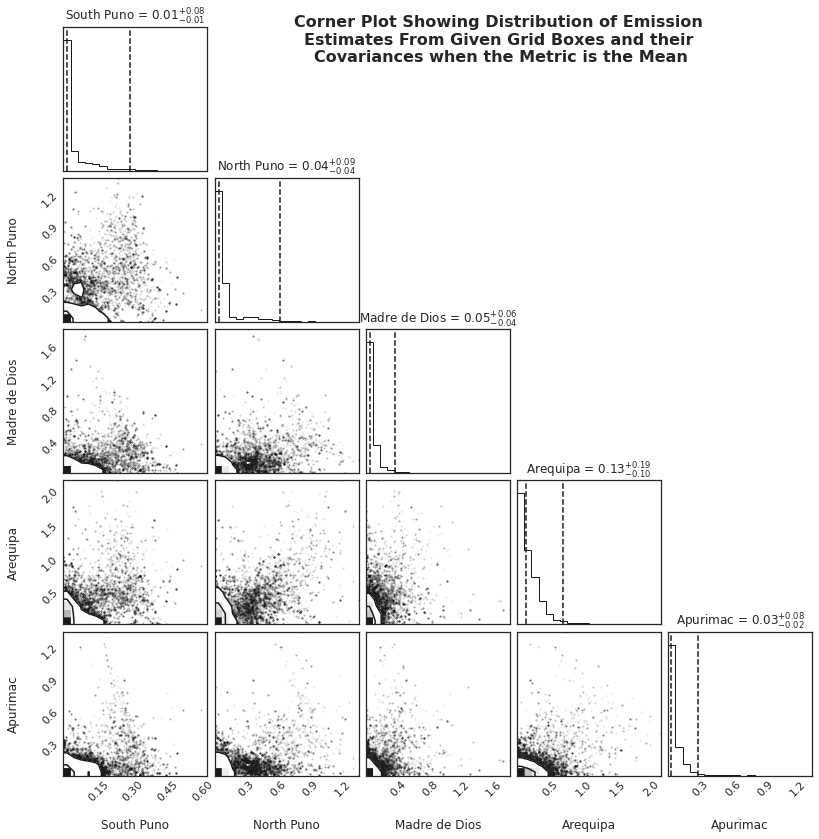

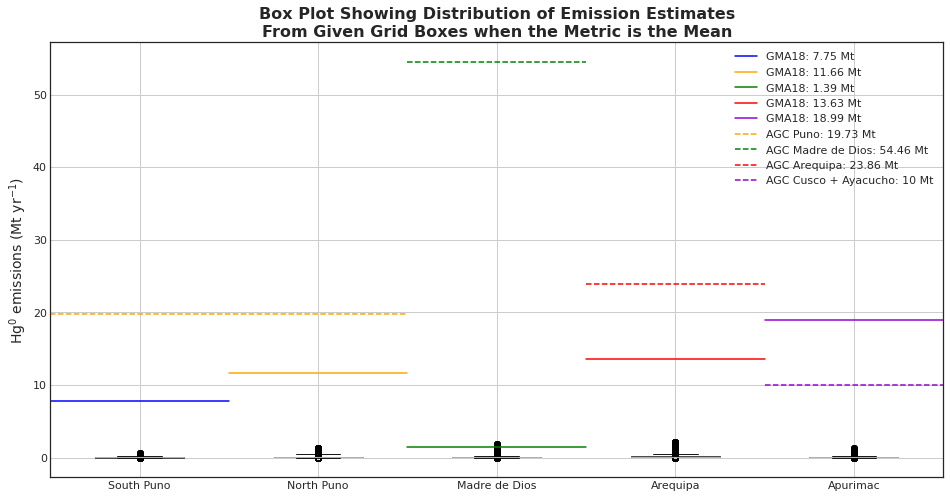

model metric is 95th percentile
The true value of y is: 0.6290249298067406 
 
the error is: 1e-05
Running burn-in...
Running production...


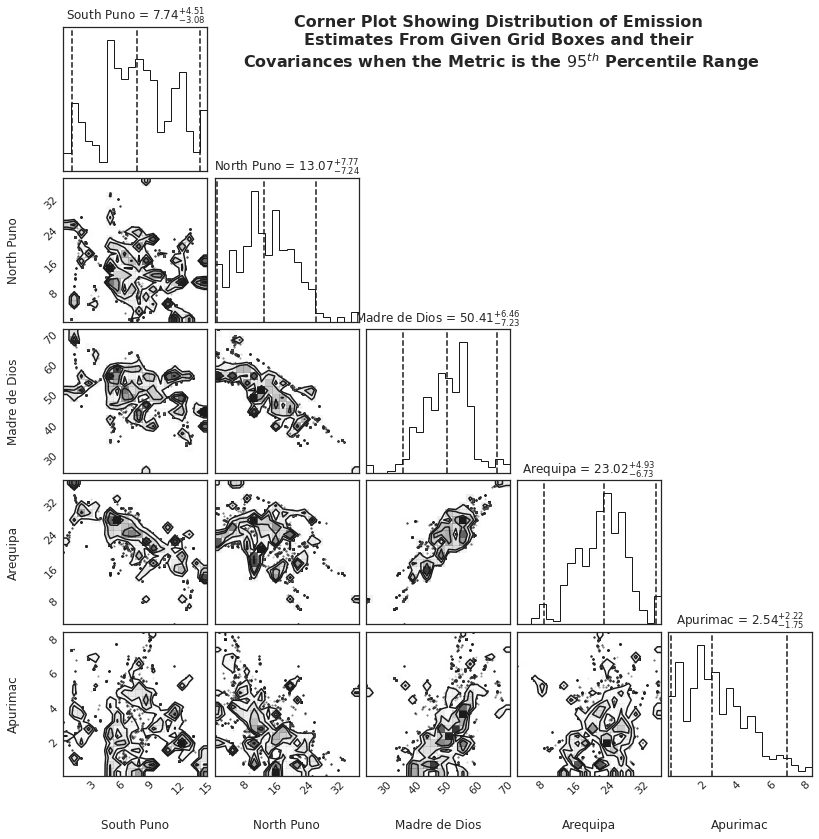

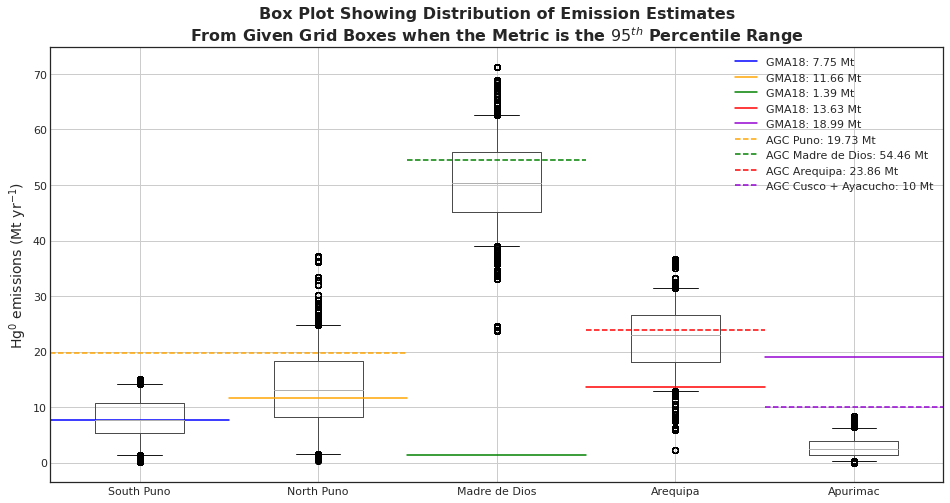

model metric is IQR
Running burn-in...
Running production...


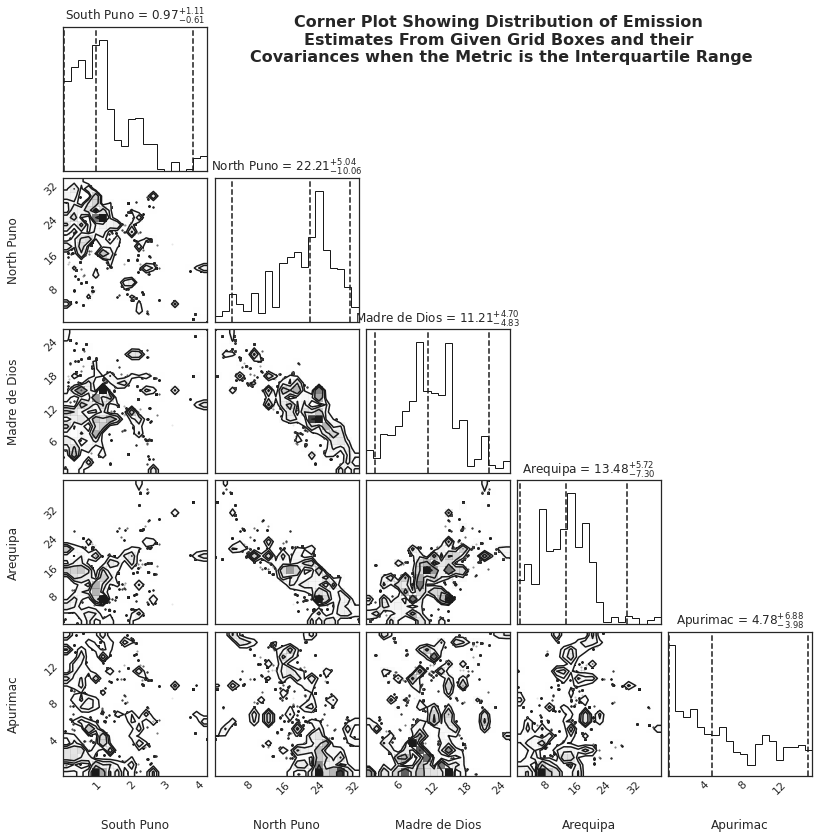

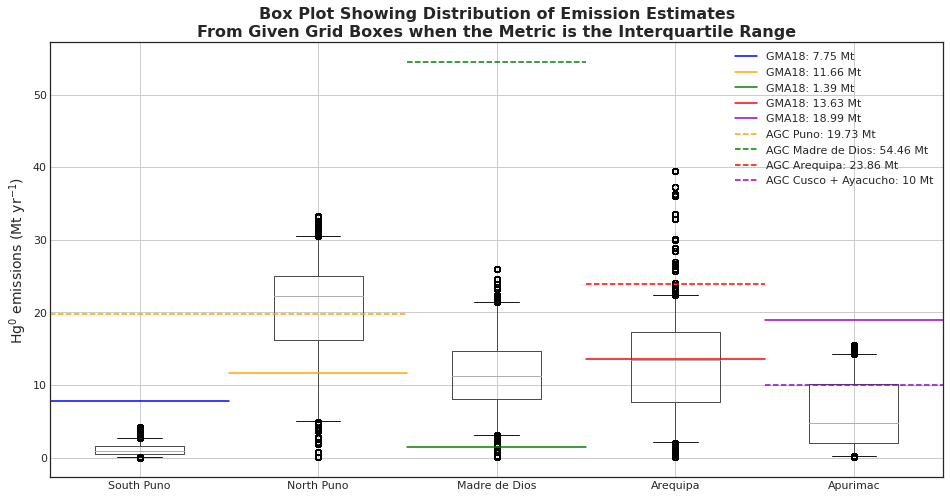

In [6]:
CompareMetric={}
init = np.array([7.75, 11.66, 50, 23.86, 1.5]) 
metrics=['mean','95th','iqr']
error=0.00001
ref_sites=0
super_dict={}
for metric in metrics:
    if metric=='mean':
        met='Mean'
    elif metric=='95th':
        met= '$95^{th}$ Percentile Range'
    else:
        met= 'Interquartile Range'
    
    
    
    #select the model based on the metric being used
    model = set_metric(metric)
    # initialize the constant teerms based on the right model
    ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(ref_sites)
    #run MCMC simulation
    sampler=run_simulation_error(ref_sites,metric,init,error)
    super_dict[metric]= sampler
    #create corner plot
    corner_title= 'Corner Plot Showing Distribution of Emission \nEstimates From Given Grid Boxes and their \nCovariances when the Metric is the '+met
    plotCorner(sampler,corner_title)
    #create boxplot box_title= 'Box Plot Showing Distribution of Emission Estimates\nFrom Given Grid Boxes when the Metric is the '+met
    box_title= 'Box Plot Showing Distribution of Emission Estimates\nFrom Given Grid Boxes when the Metric is the '+met
    df_metric=plotBox(sampler,box_title)
    # store dataframe of emission estimate distibutions iqr in dictionary
    CompareMetric[metric]=df_metric.apply(find_iqr)

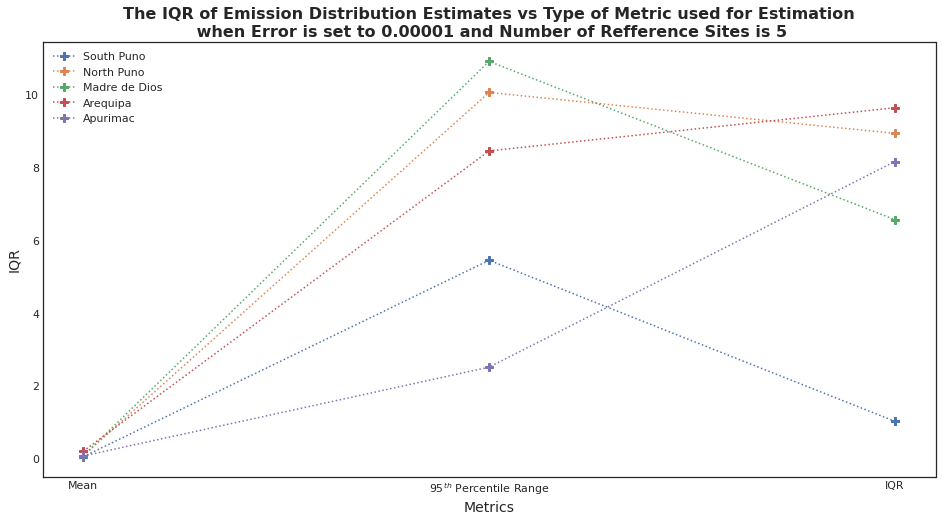

In [7]:
df_CompareMetric=pd.DataFrame(CompareMetric).T
regs=['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']
fig= plt.figure( figsize=[16,8])

ax= fig.add_subplot(111)
ax.set_title('The IQR of Emission Distribution Estimates vs Type of Metric used for Estimation\n when Error is set to 0.00001 and Number of Refference Sites is 5', size=16,fontweight="bold")
ax.set_ylabel('IQR', fontsize = 14)
ax.set_xlabel('Metrics', fontsize = 14)
for reg in regs:
    ax.plot(['Mean','$95^{th}$ Percentile Range','IQR'],df_CompareMetric[reg],'P:',ms = 8,label=reg)
ax.legend()
plt.show()
    

# Create plots showing how the IQR of the posterior emission distibutions change as the error term in the simulation decreases

0
The error in this is run:  0.02214655919528379
model metric is 95th percentile
Running burn-in...
Running production...


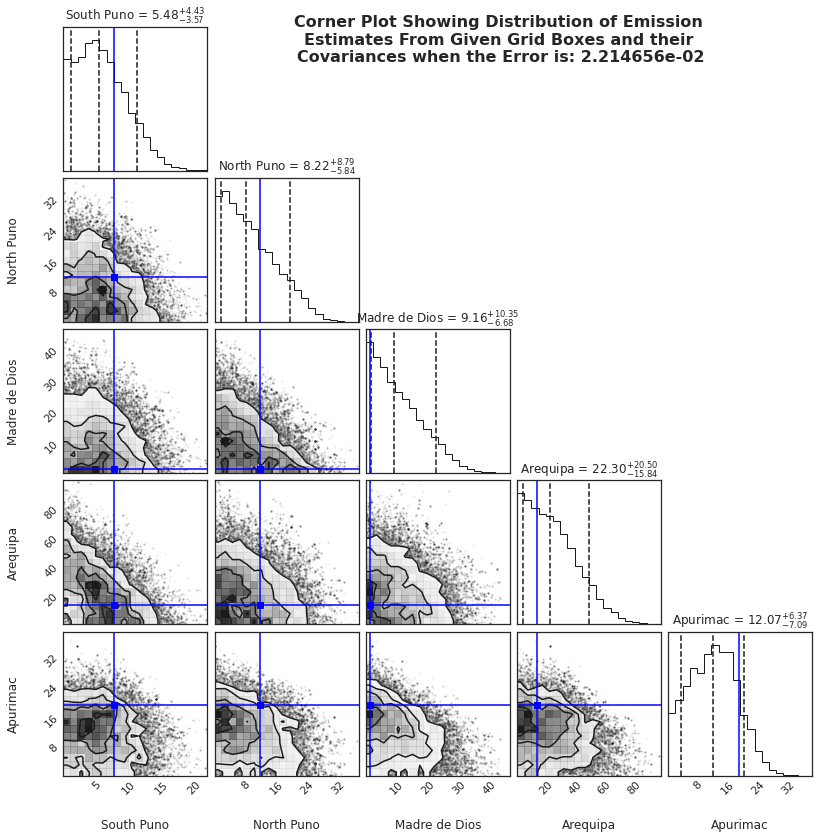

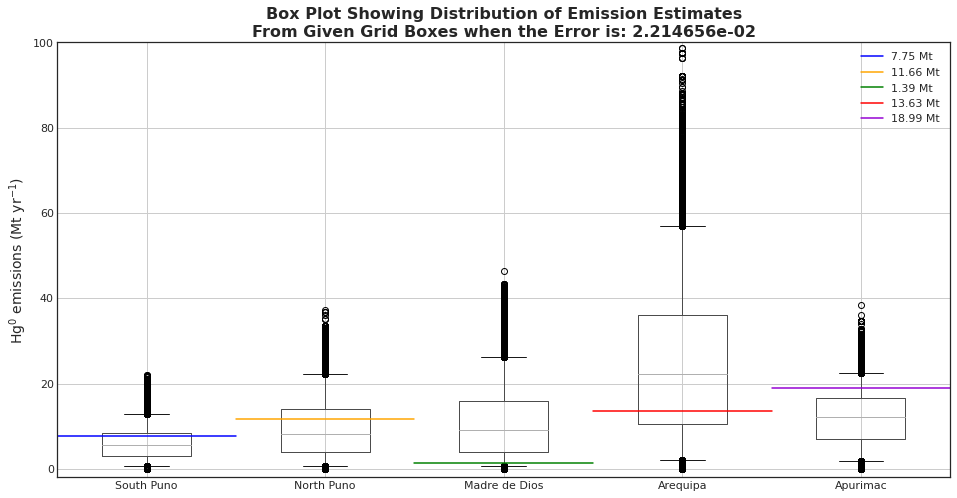

1
The error in this is run:  0.011073279597641894
model metric is 95th percentile
Running burn-in...
Running production...


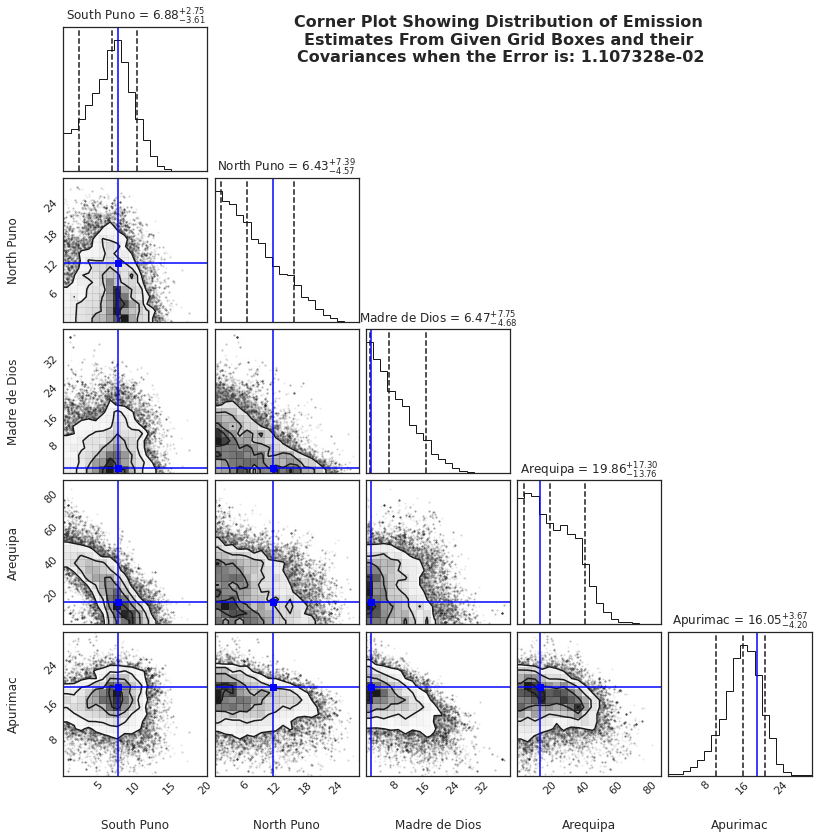

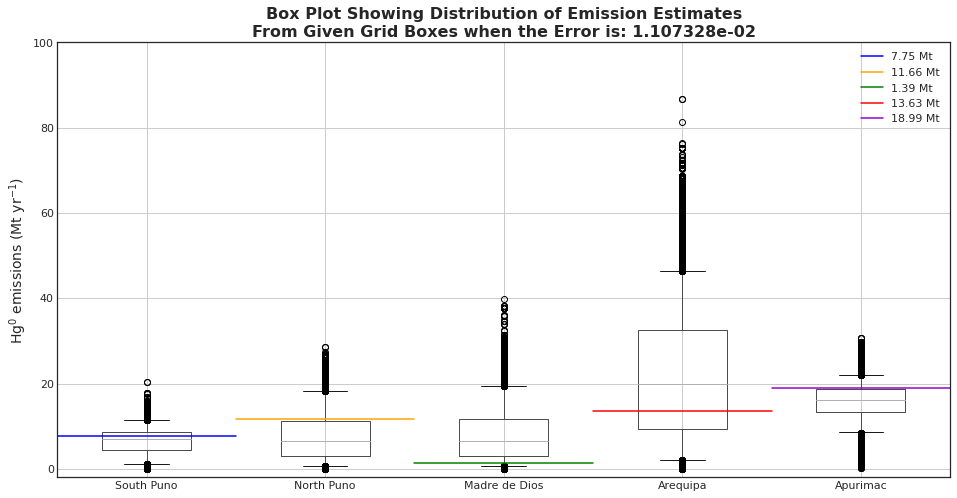

2
The error in this is run:  0.005536639798820947
model metric is 95th percentile
Running burn-in...
Running production...


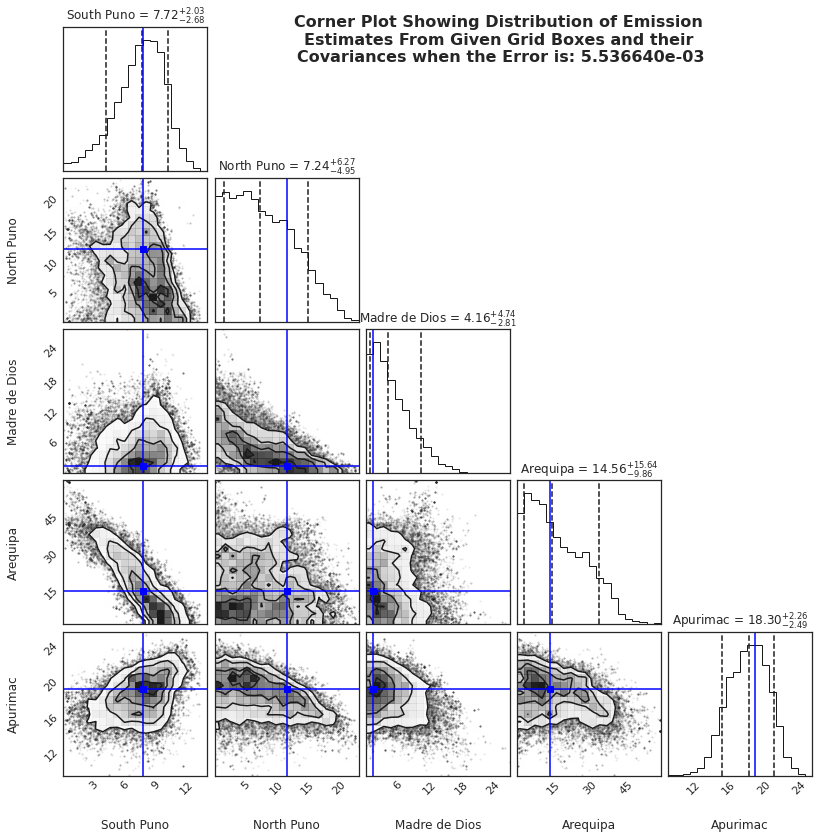

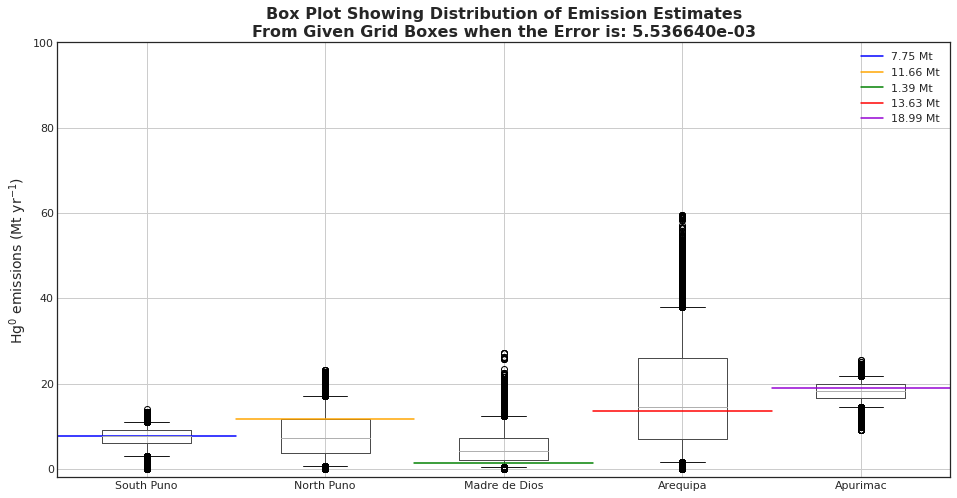

3
The error in this is run:  0.0027683198994104736
model metric is 95th percentile
Running burn-in...
Running production...


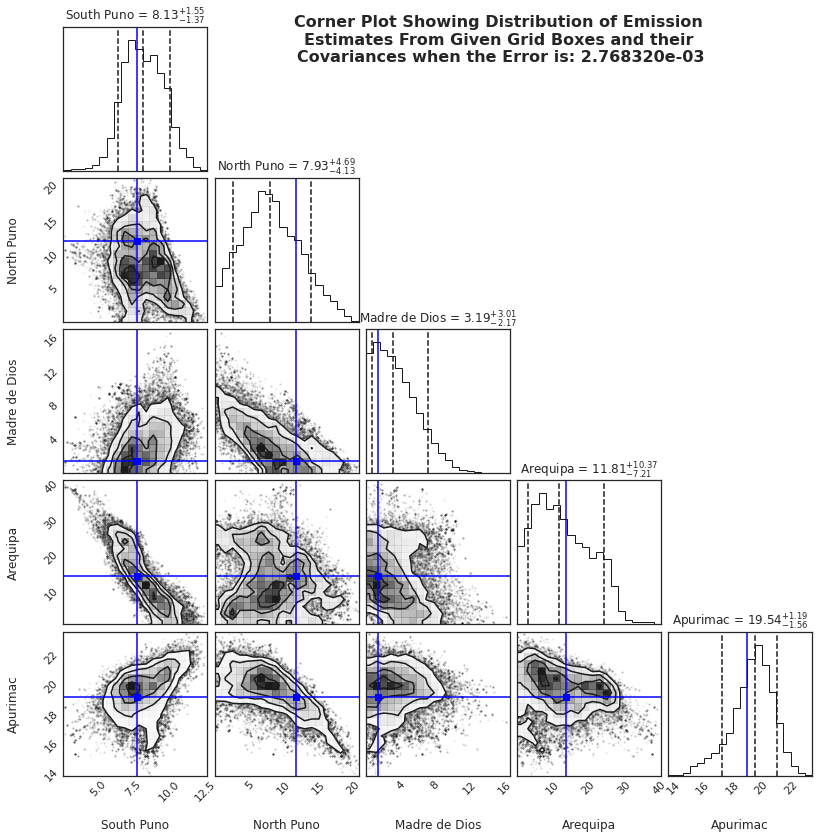

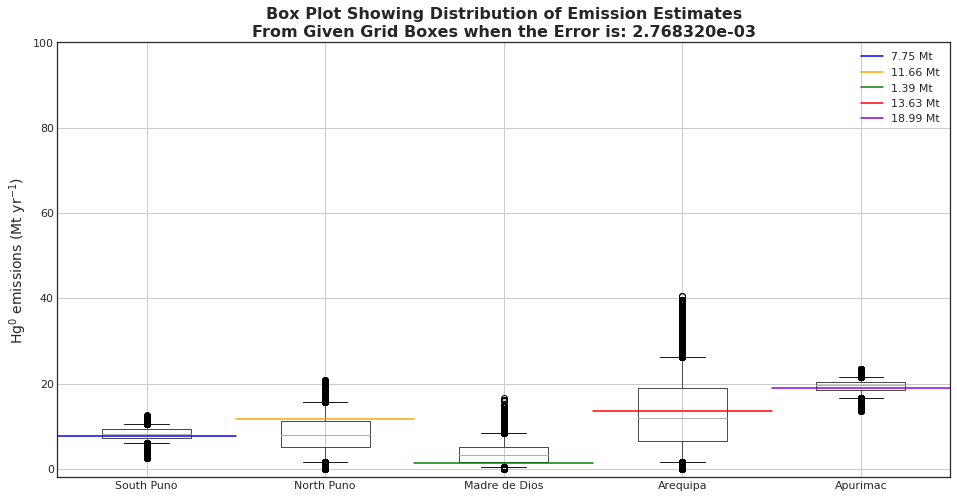

4
The error in this is run:  0.0013841599497052368
model metric is 95th percentile
Running burn-in...
Running production...


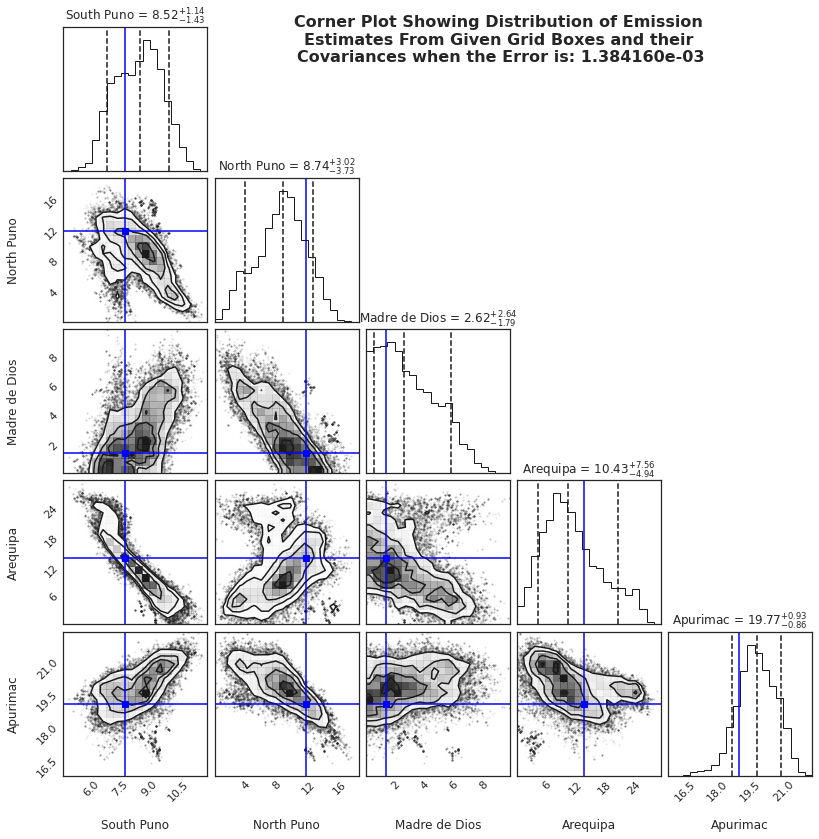

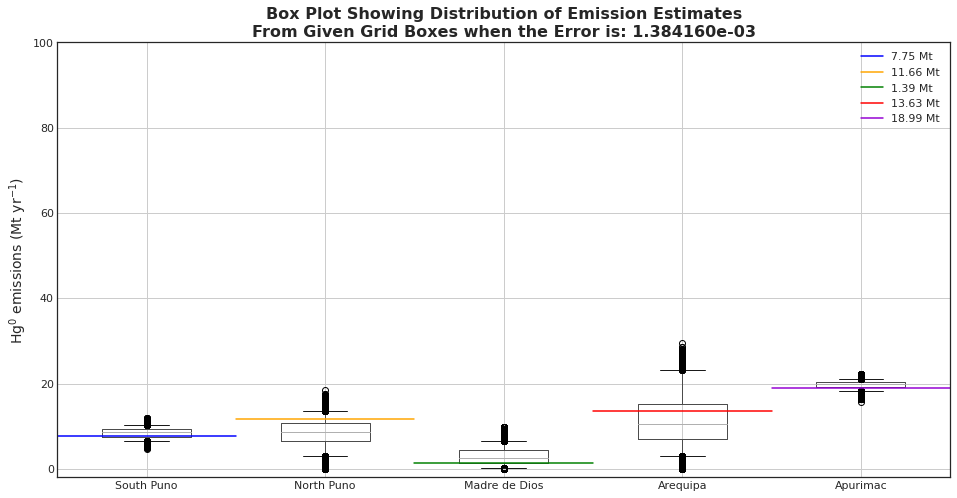

5
The error in this is run:  0.0006920799748526184
model metric is 95th percentile
Running burn-in...
Running production...


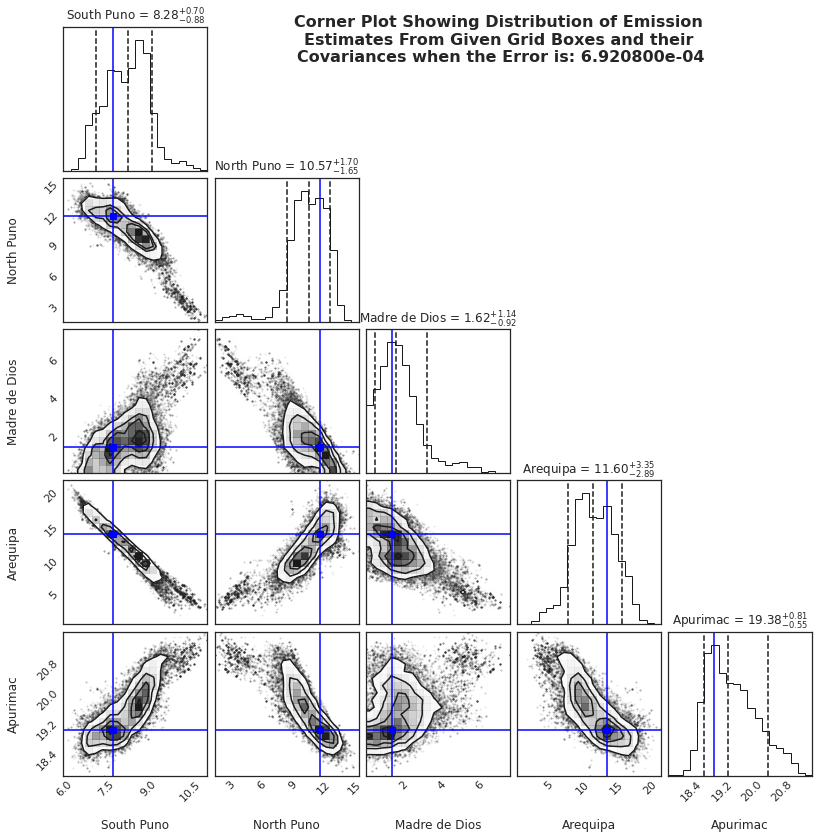

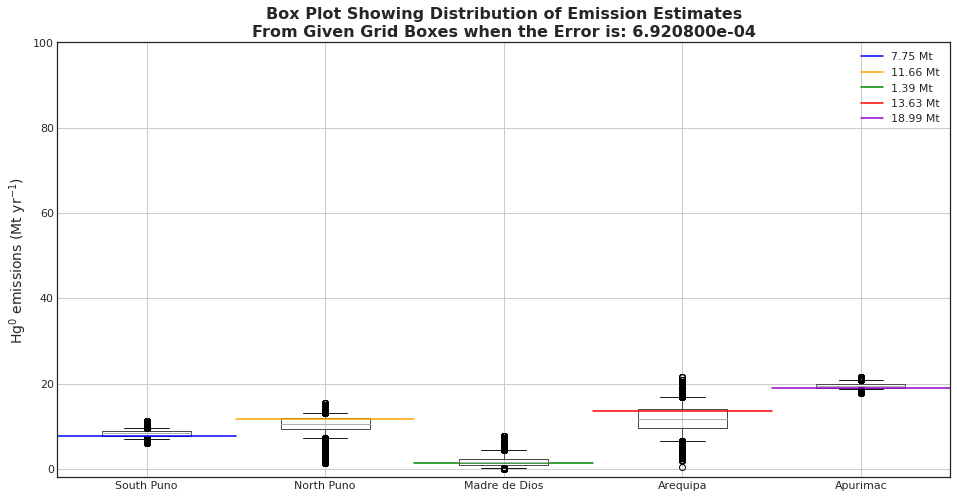

6
The error in this is run:  0.0003460399874263092
model metric is 95th percentile
Running burn-in...
Running production...


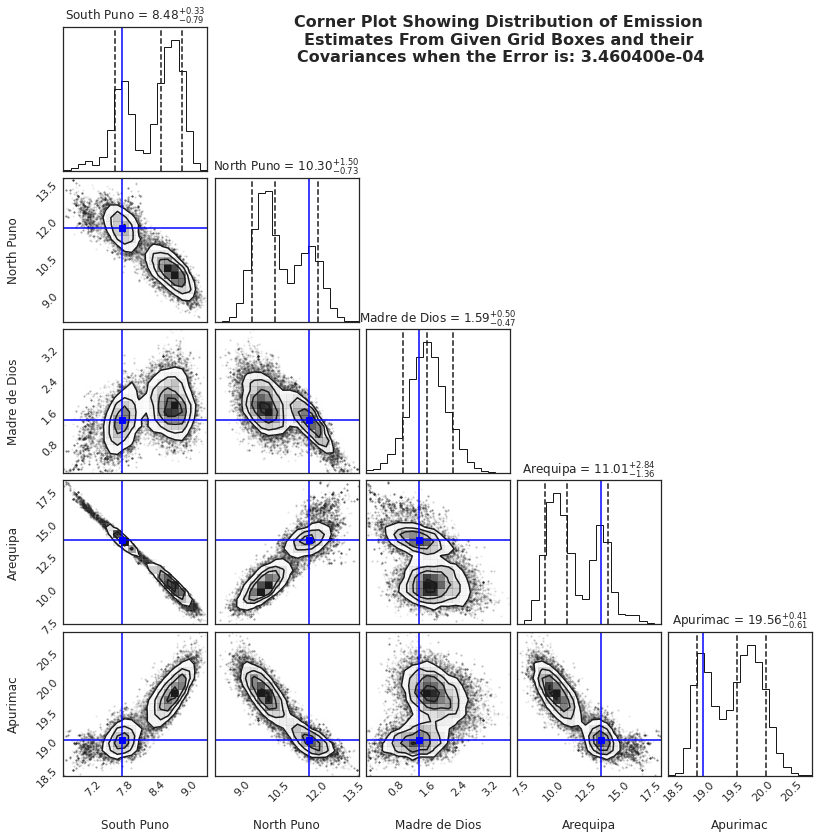

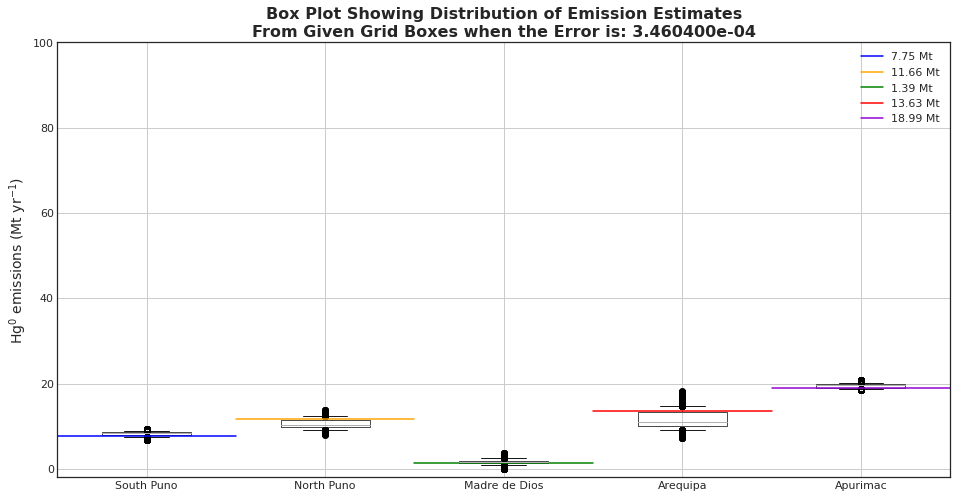

7
The error in this is run:  0.0001730199937131546
model metric is 95th percentile
Running burn-in...
Running production...


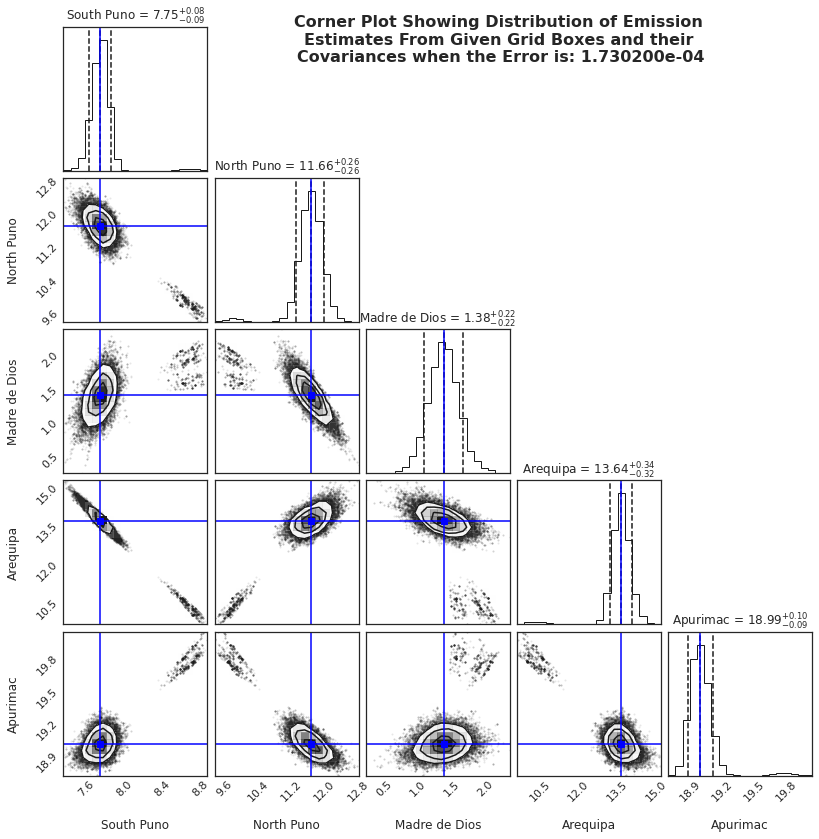

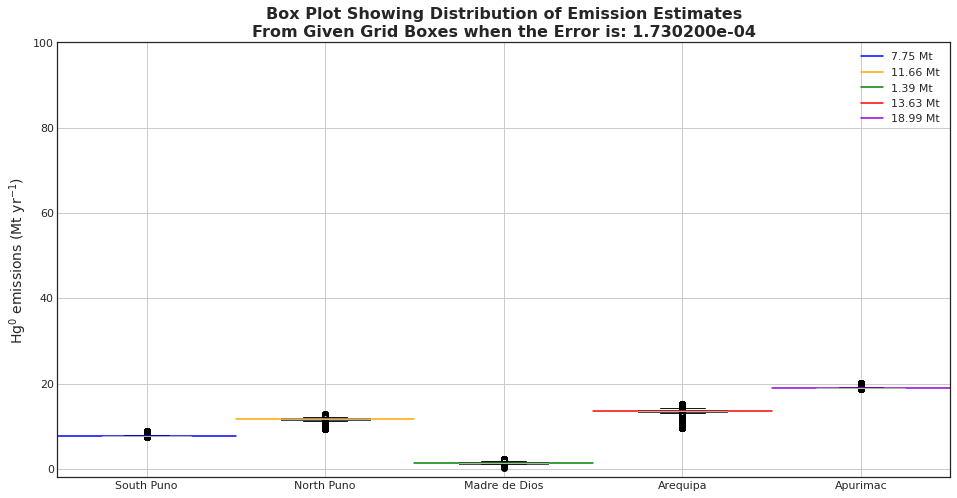

8
The error in this is run:  8.65099968565773e-05
model metric is 95th percentile
Running burn-in...
Running production...


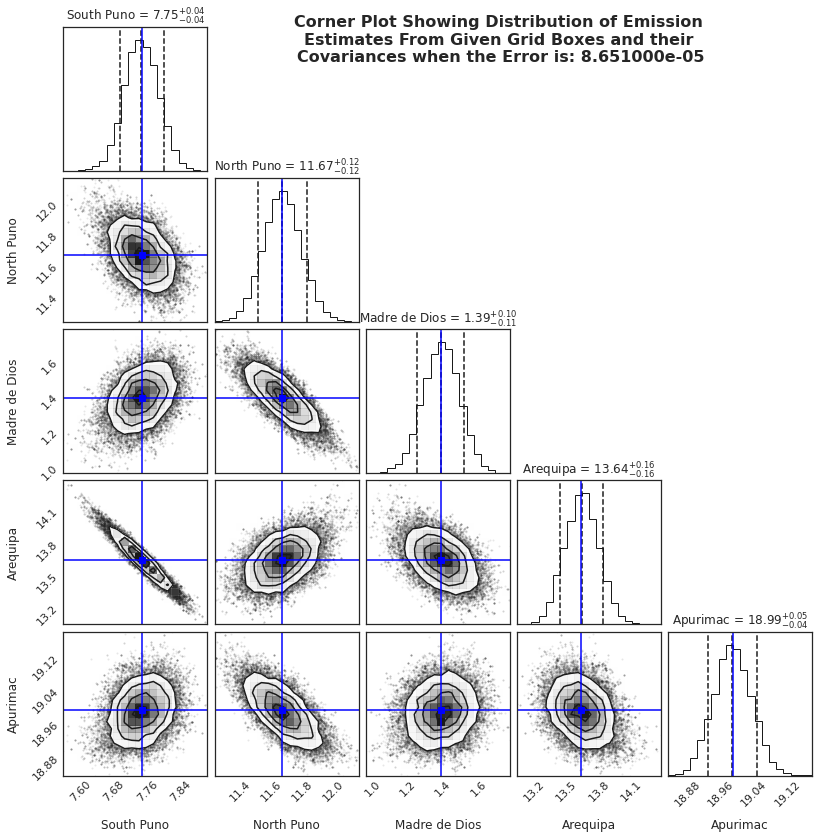

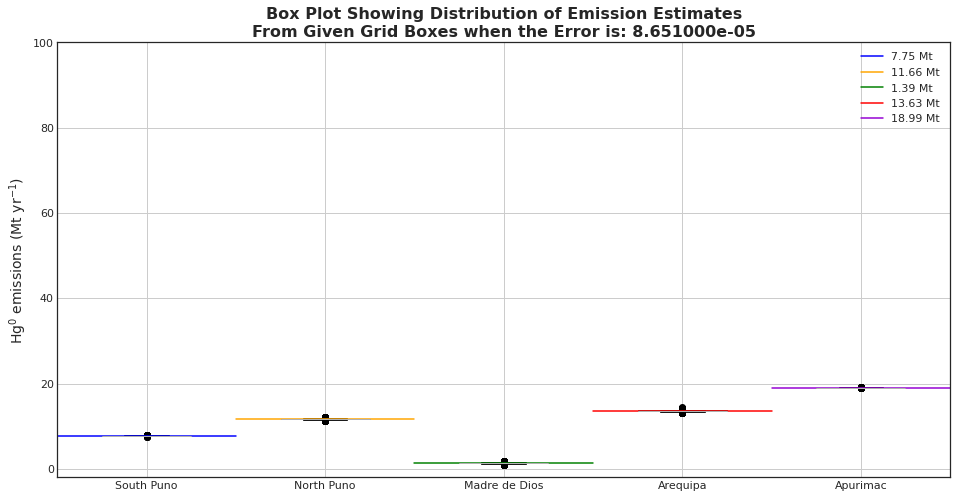

9
The error in this is run:  4.325499842828865e-05
model metric is 95th percentile
Running burn-in...
Running production...


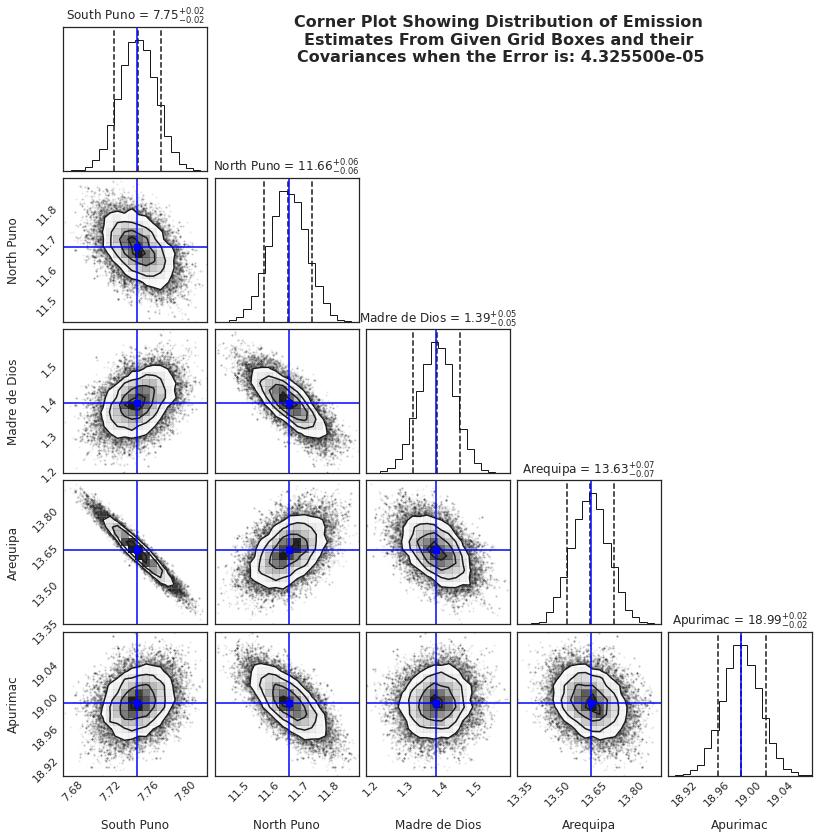

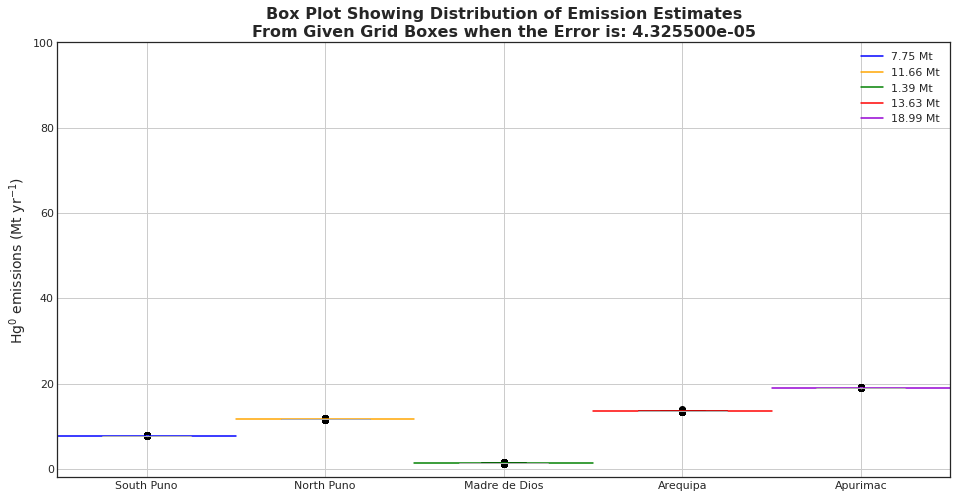

In [53]:
#calculate initial error based on data
data = getBoxesAround(5).values
res = bootstrap((data,), fun_95th)
y_err = (np.array(res.standard_error)).mean()
#specify the number of sites
ref_sites=0 # 0 is equivalent to one site 
#initialize the priors
init = np.array([7.75, 11.66, 54, 23.86, 1.5]) 
#set up dictionary for capturing the IQRs for each error per site
rangeVerror={}
for i in range(10):
    print(i)
    print("The error in this is run: ",y_err)
    metric = '95th'
    model = set_metric(metric)
    ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(ref_sites)
    sampler=run_simulation_error(ref_sites,metric,y_err)
    # plot corner 
    corner_title= 'Corner Plot Showing Distribution of Emission \nEstimates From Given Grid Boxes and their \nCovariances when the Error is: '+str("{:e}".format(x))
    plotCorner(sampler,corner_title)
    #plot boxplot
    box_title= 'Box Plot Showing Distribution of Emission Estimates\nFrom Given Grid Boxes when the Error is: '+str("{:e}".format(x))
    df=plotBox(sampler,box_title)
    rangeVerror[x]=df.apply(find_iqr)
    x=0.5*x
    


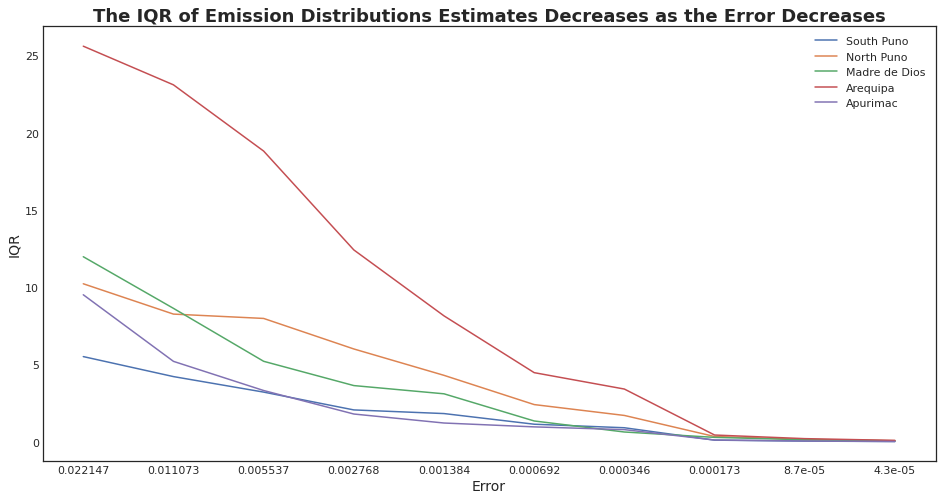

In [54]:
df_rangeVerror=pd.DataFrame(rangeVerror).T  
df_error=df_rangeVerror.reset_index()
fig= plt.figure( figsize=[16,8])
ax= fig.add_subplot(111)
df_error[['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']].plot(ax=ax)
ax.legend()
ax.set_ylabel('IQR', fontsize = 14)
ax.set_xlabel('Error', fontsize = 14)
ax.set_title('The IQR of Emission Distributions Estimates Decreases as the Error Decreases', size=18,fontweight="bold")
ax.set_xticks(list(range(10)))
ax.set_xticklabels(round(df_error['index'],6))
plt.show()

# Create plot summary plot showing how the IQR of the posterior emission distibutions change as the number of sites used in the simulation increases

In [ ]:
ref_sites=0
init = np.array([7.75, 11.66, 50, 23.86, 1.5]) 
print(f"This run uses {ref_sites +1} of reference sites")
data = get_detrended_obs().to_numpy()
res = bootstrap((data,), fun_95th)
y_err = (np.array(res.standard_error)).mean()
metric = '95th'
model = set_metric(metric)
ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(ref_sites)
initial_model=model(init)
x=0.00010368282530757292
print(f"The first model output is: {initial_model} ")
for i in range(10):
    sampler=run_simulation(ref_sites,metric,init,x)
    #plotChain(sampler)
    plotCorner(sampler)
    plotBox(sampler)
    x=x*0.5
    

0
The number of sites in this is run in:  1
model metric is 95th percentile
Running burn-in...
Running production...


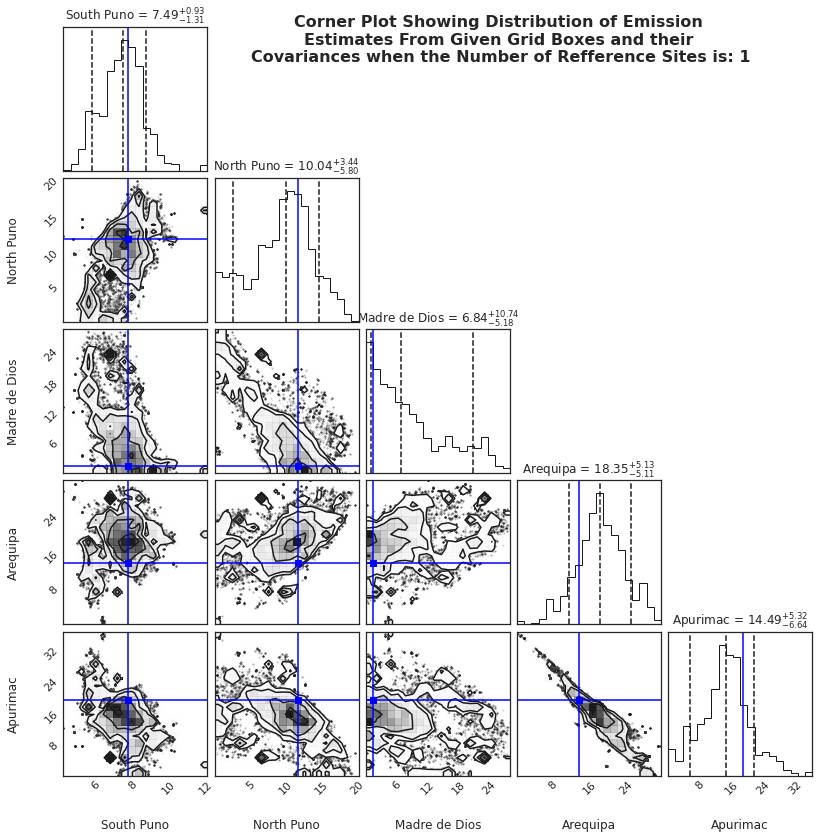

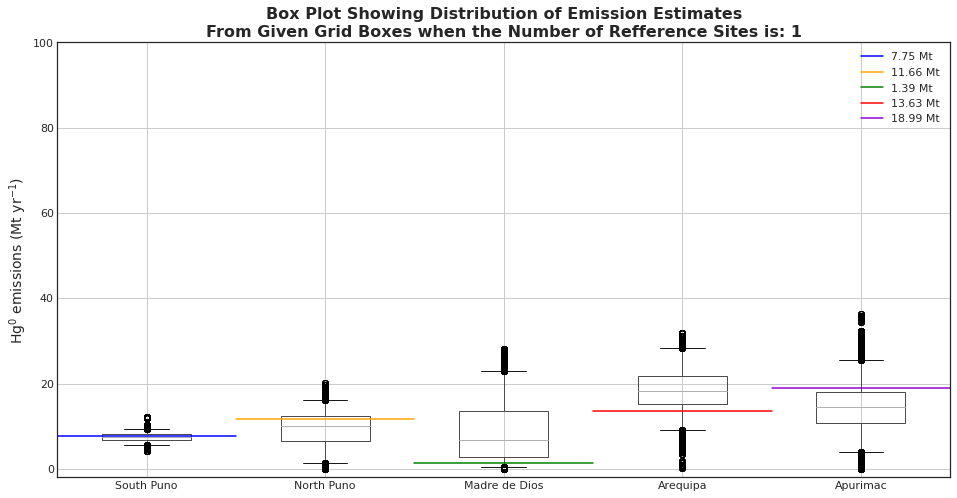

1
The number of sites in this is run in:  2
model metric is 95th percentile
Running burn-in...
Running production...


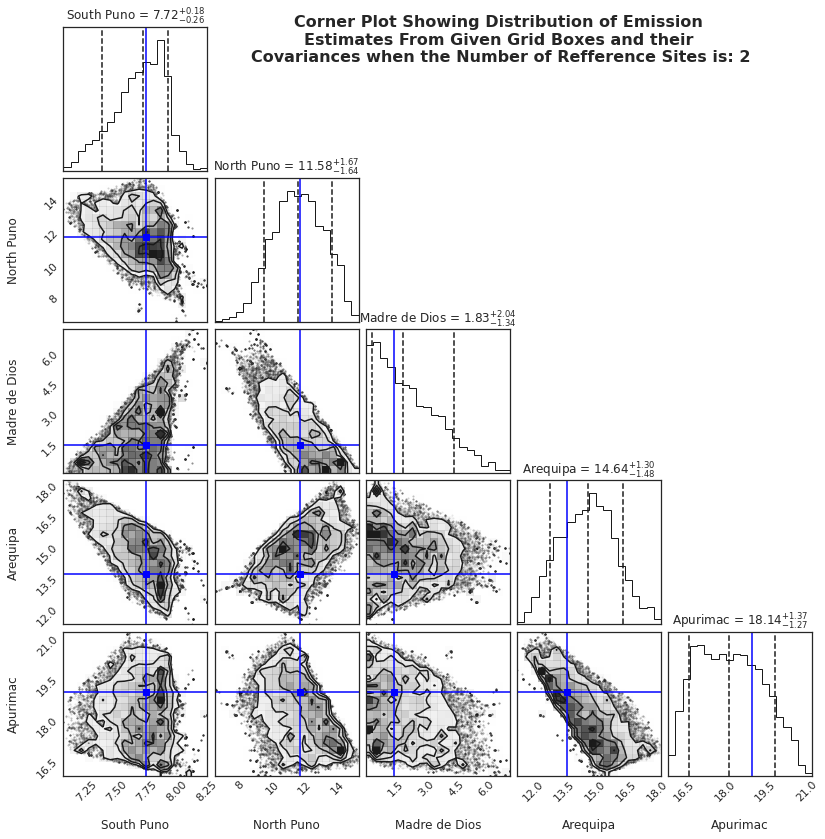

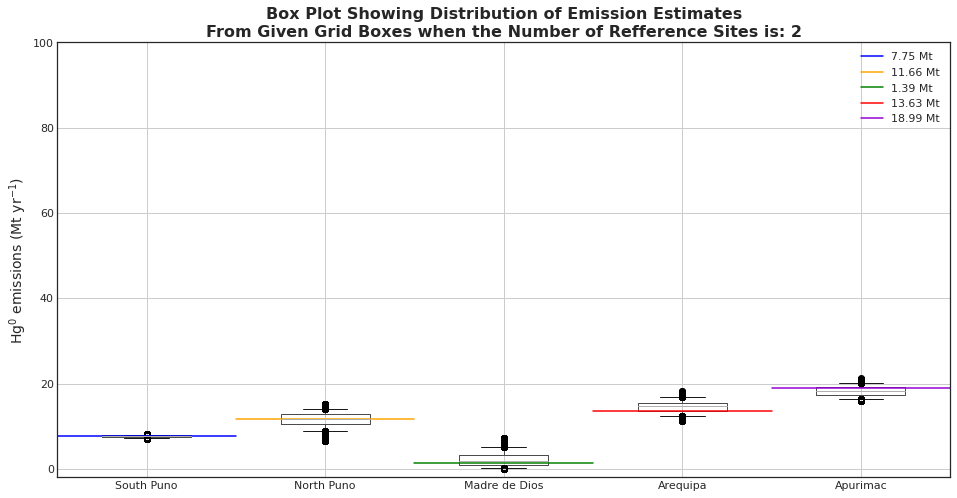

2
The number of sites in this is run in:  3
model metric is 95th percentile
Running burn-in...
Running production...


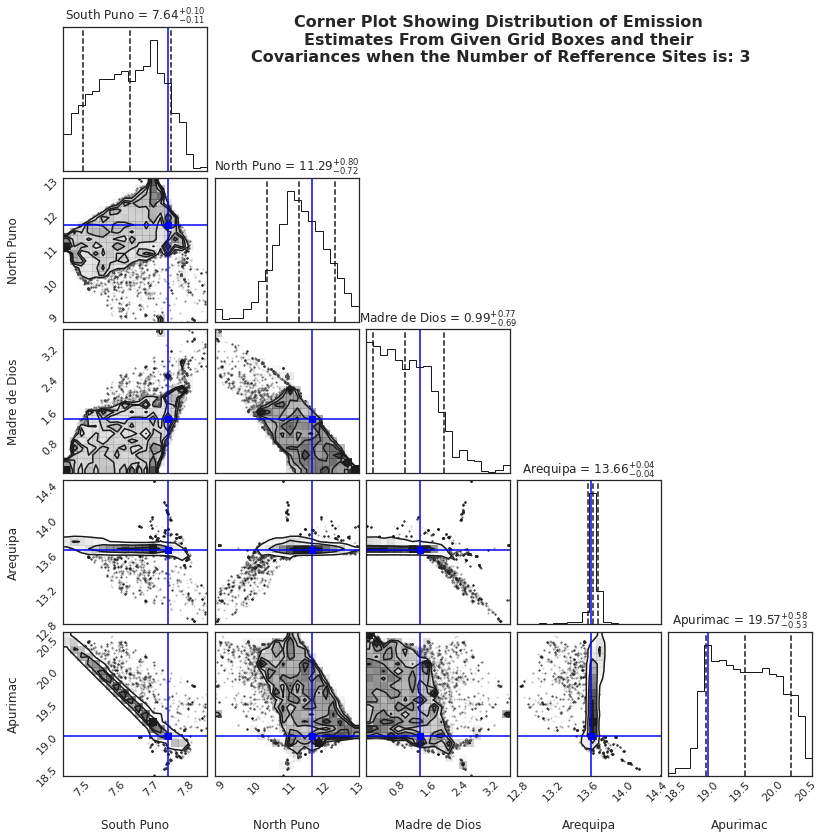

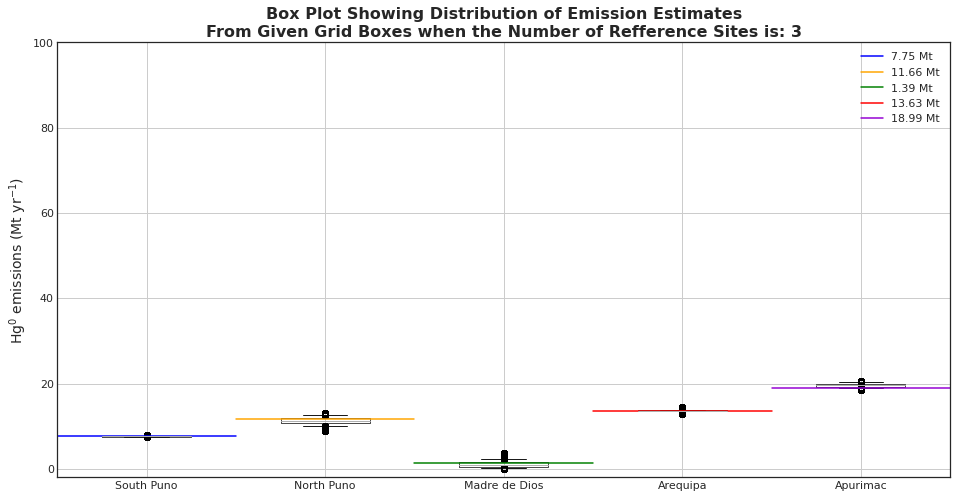

3
The number of sites in this is run in:  4
model metric is 95th percentile
Running burn-in...
Running production...


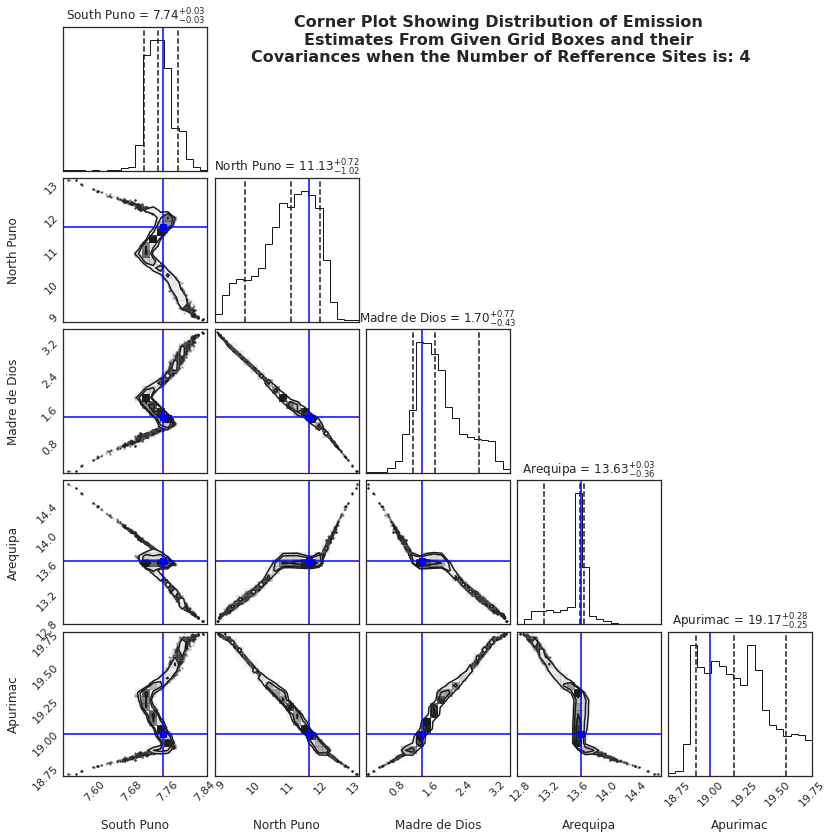

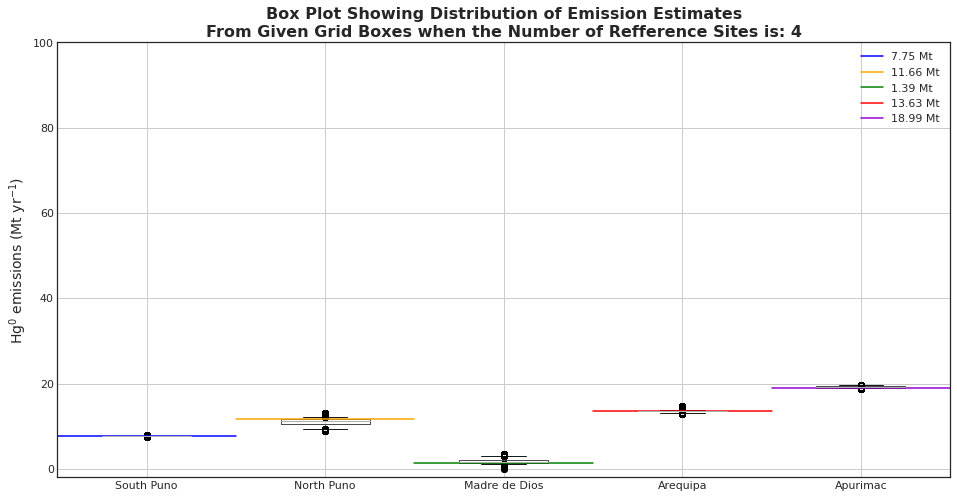

4
The number of sites in this is run in:  5
model metric is 95th percentile
Running burn-in...
Running production...


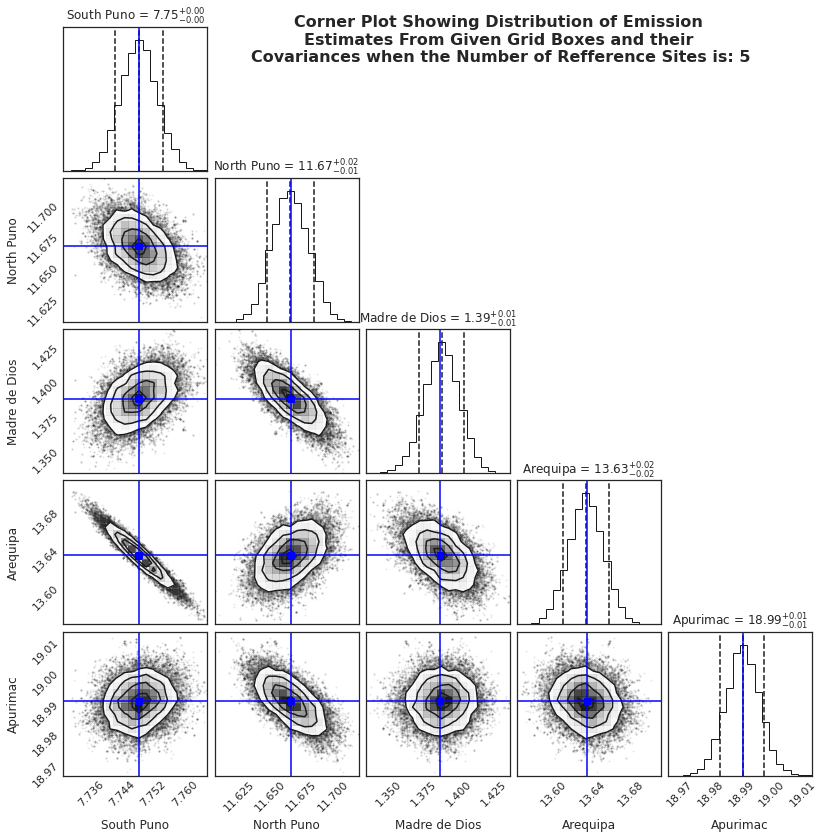

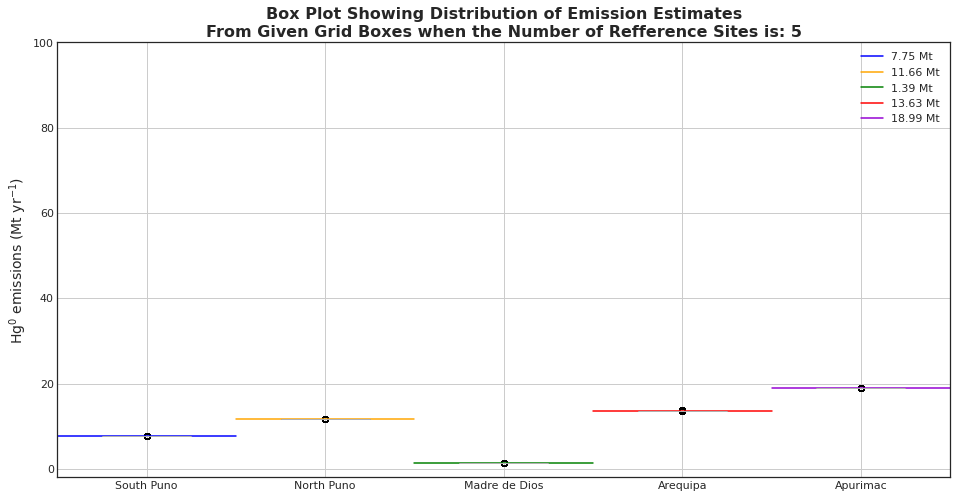

5
The number of sites in this is run in:  6
model metric is 95th percentile
Running burn-in...
Running production...


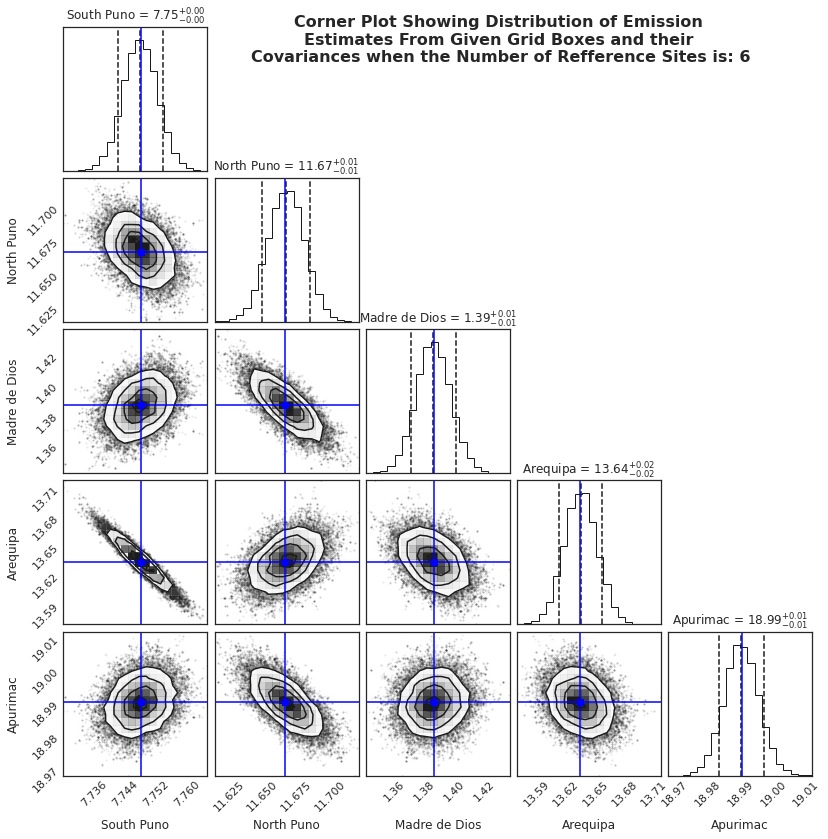

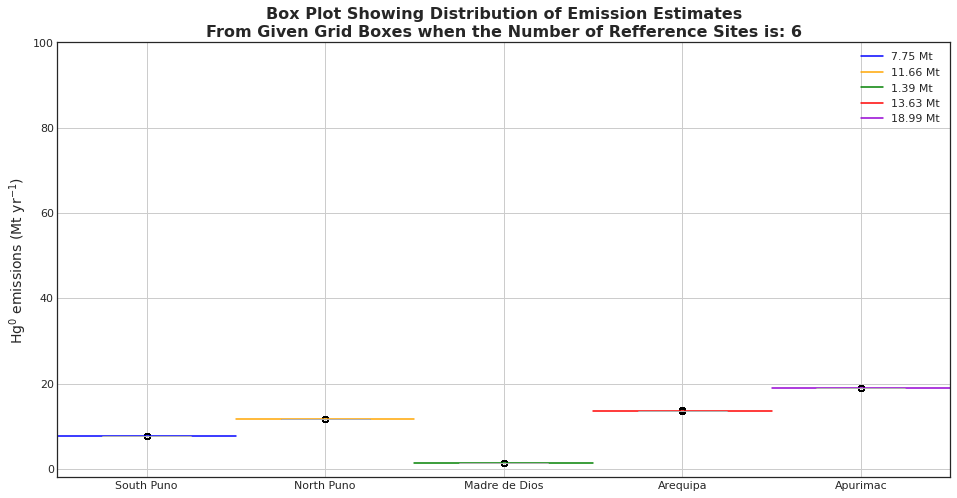

6
The number of sites in this is run in:  7
model metric is 95th percentile
Running burn-in...
Running production...


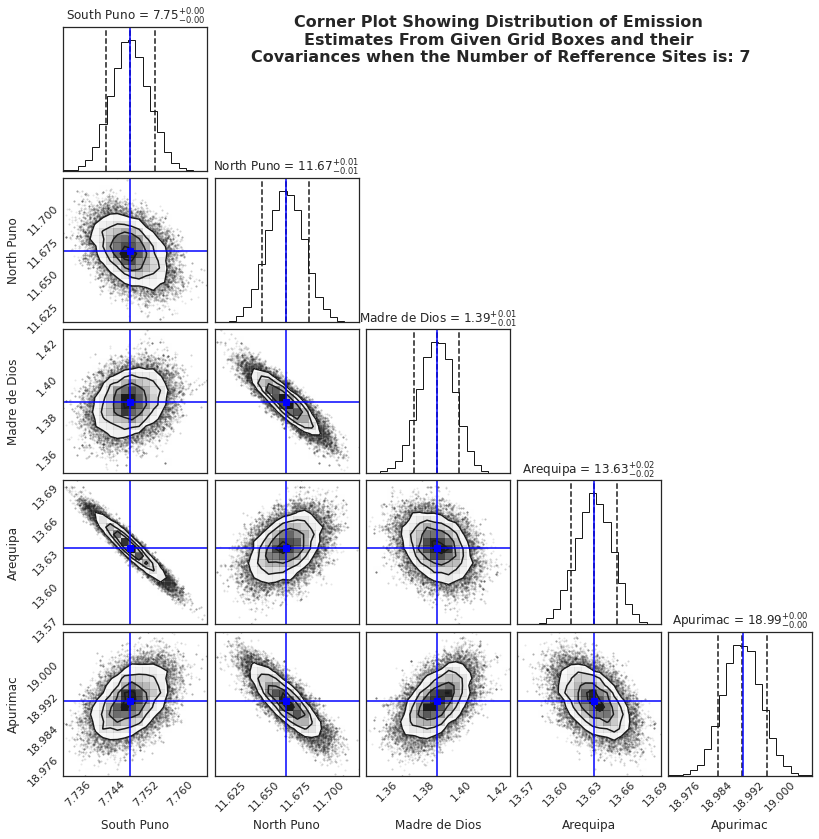

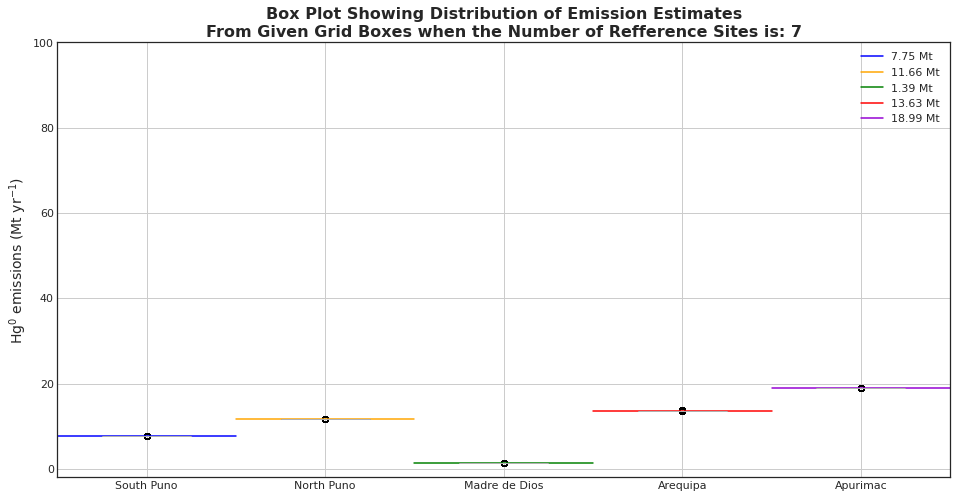

7
The number of sites in this is run in:  8
model metric is 95th percentile
Running burn-in...
Running production...


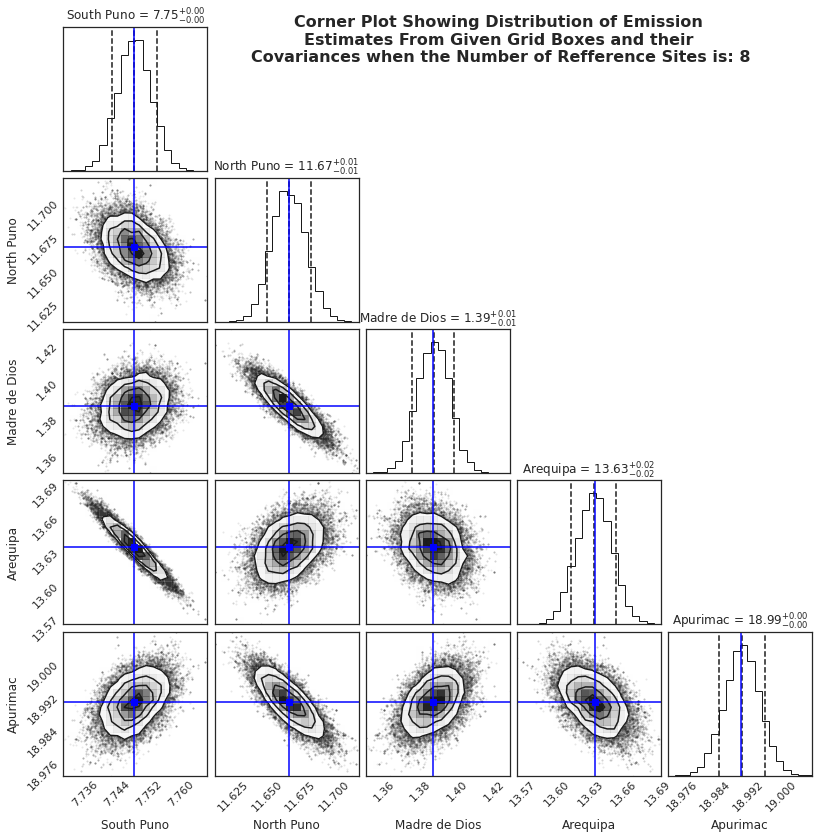

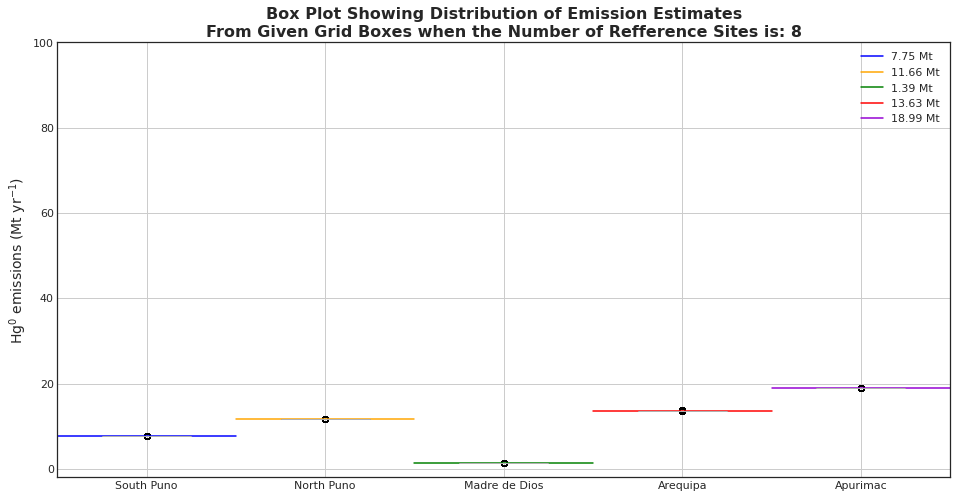

8
The number of sites in this is run in:  9
model metric is 95th percentile
Running burn-in...
Running production...


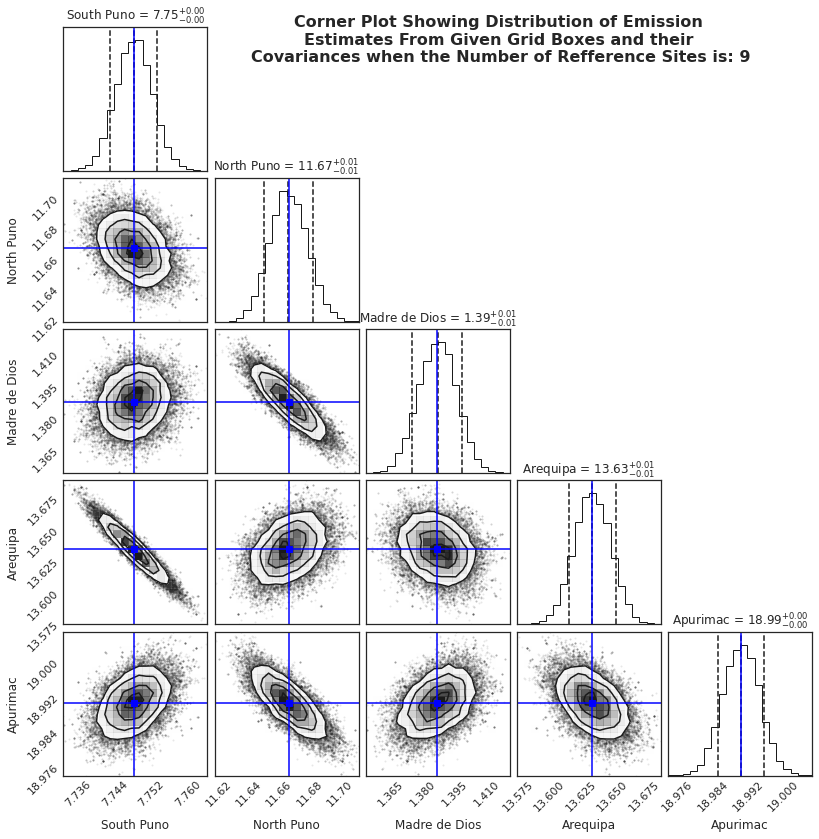

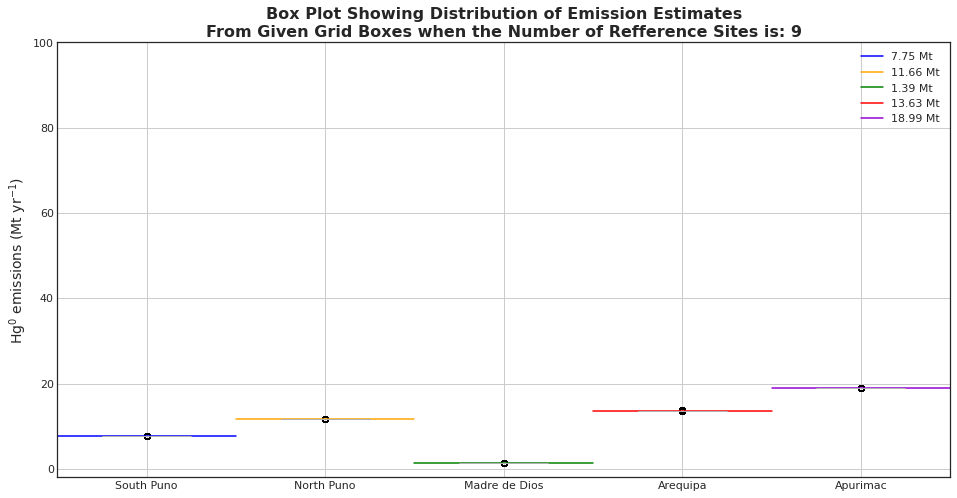

9
The number of sites in this is run in:  10
model metric is 95th percentile
Running burn-in...
Running production...


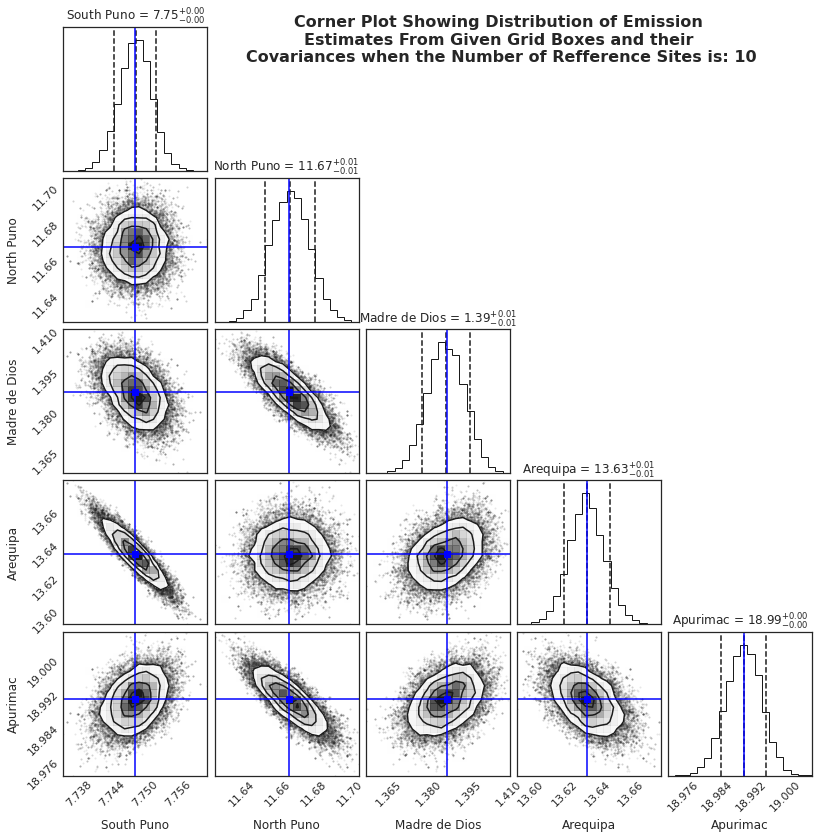

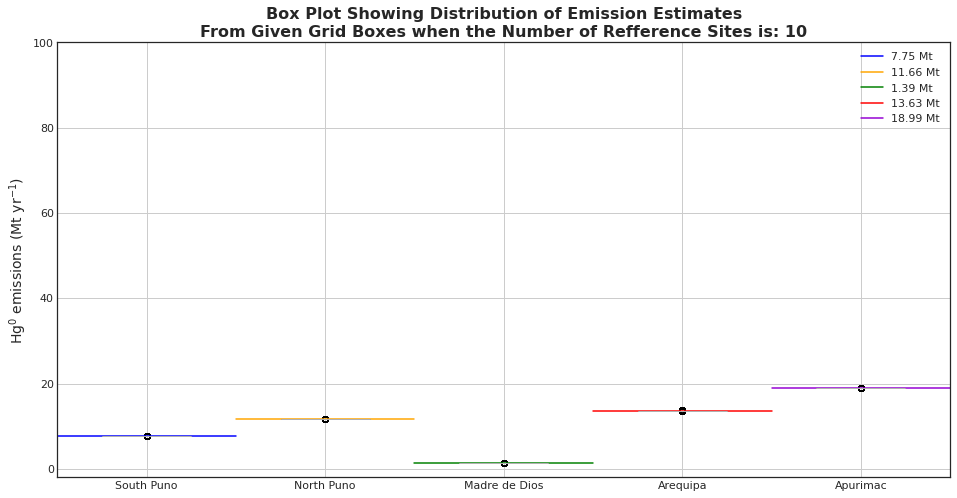

In [55]:
# ref_sites=0
# init = np.array([7.75, 11.66, 50, 23.86, 1.5]) 
# print(f"This run uses {ref_sites +1} of reference sites")
# metric = '95th'
# model = set_metric(metric)
# ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(ref_sites)
# initial_model=model(init)
# print(f"The first model output is: {initial_model} ")

# sampler=run_simulation(ref_sites,metric,init)
# #plotChain(sampler)
# plotCorner(sampler)
# plotBox(sampler)

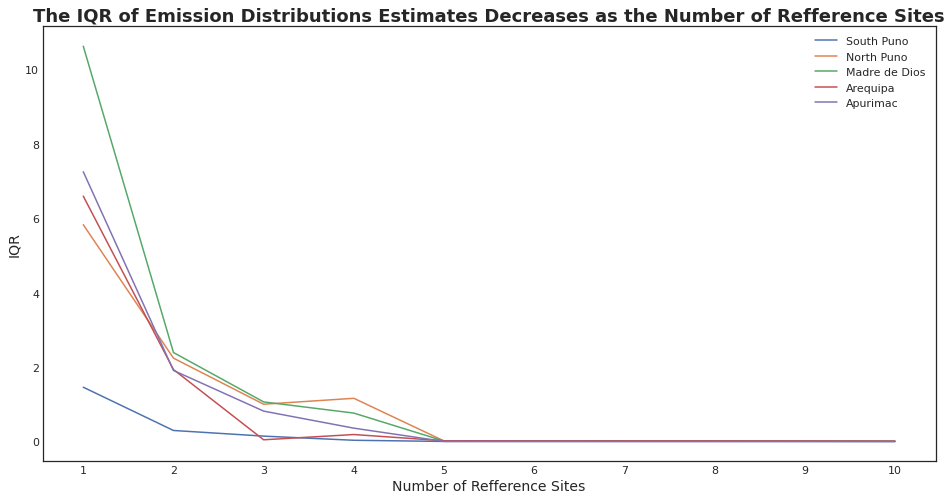

In [56]:
df_RangeVsiteNum=pd.DataFrame(RangeVsiteNum).T  
df_siteNum=df_RangeVsiteNum.reset_index()
fig= plt.figure( figsize=[16,8])
ax= fig.add_subplot(111)
df_siteNum[['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']].plot(ax=ax)
ax.legend()
ax.set_ylabel('IQR', fontsize = 14)
ax.set_xlabel('Number of Refference Sites', fontsize = 14)
ax.set_title('The IQR of Emission Distributions Estimates Decreases as the Number of Refference Sites', size=18,fontweight="bold")
ax.set_xticks(list(range(10)))
ax.set_xticklabels(list(range(1,11)))
plt.show()